# Testing the Locative vs. Durative Division in Time Adverbials

Hypothesis: Locative and durative time adverbials constitute two distinct categories of time adverbials which function and behave differently in the clause.

In [1]:
from scripts.imports import *
out = Exporter(paths['outdir'], 'timeXvlex')

In [2]:
print(df.shape)
print(df_sg.shape)

(3648, 45)
(2575, 45)


In [3]:
df.head()

,verse,book,booksuper,canon_part,period,genre,domain,gendom,function,quality,...,TIMEAPPO,SPEC,SFX:3,SFX,DUAL,DEMON,SFX:1,SFX:2,ADVB,CARDC
node,,,,,,,,,,,,,,,,,,,,,
427553,Genesis 1:1,Genesis,Genesis,Law,SBH,prose,?,prose.?,simultaneous,location,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
427680,Genesis 2:2,Genesis,Genesis,Law,SBH,prose,N,prose.N,simultaneous,location,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
427682,Genesis 2:2,Genesis,Genesis,Law,SBH,prose,N,prose.N,simultaneous,location,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
427693,Genesis 2:5,Genesis,Genesis,Law,SBH,prose,D,prose.D,anterior,sequence,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
427694,Genesis 2:5,Genesis,Genesis,Law,SBH,prose,D,prose.D,anterior,sequence,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df_sg.head()

,verse,book,booksuper,canon_part,period,genre,domain,gendom,function,quality,...,TIMEAPPO,SPEC,SFX:3,SFX,DUAL,DEMON,SFX:1,SFX:2,ADVB,CARDC
node,,,,,,,,,,,,,,,,,,,,,
427553,Genesis 1:1,Genesis,Genesis,Law,SBH,prose,?,prose.?,simultaneous,location,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
427680,Genesis 2:2,Genesis,Genesis,Law,SBH,prose,N,prose.N,simultaneous,location,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
427682,Genesis 2:2,Genesis,Genesis,Law,SBH,prose,N,prose.N,simultaneous,location,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
427805,Genesis 3:8,Genesis,Genesis,Law,SBH,prose,N,prose.N,simultaneous,location,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
427835,Genesis 3:14,Genesis,Genesis,Law,SBH,prose,Q,prose.Q,atelic_ext,duration,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Examining Lex Tokens

In [5]:
df_sg.lex_token.unique().shape

(70,)

In [6]:
token_ct_raw = pd.DataFrame(df_sg.lex_token.value_counts())

token_ct_raw.head()

,lex_token
ה.ז׳,319
מ׳.ז׳,281
ב.ז׳,263
ב.ה.ז׳.הוא,221
ל.ז׳,205


Tokens >= 5 occurrences:

In [7]:
top_token_ct = token_ct_raw[token_ct_raw.lex_token >= 5]

print(top_token_ct.shape)

top_token_ct

(28, 1)


,lex_token
ה.ז׳,319
מ׳.ז׳,281
ב.ז׳,263
ב.ה.ז׳.הוא,221
ל.ז׳,205
ב.ה.ז׳,195
ז׳,153
ב.ה.ז׳.ס׳,146
עד.ז׳,139
ב.מ׳.ז׳,82


## Verb Lexeme

In [8]:
vlex_ct = pd.pivot_table(
    df_sg[df_sg.lex_token.isin(top_token_ct.index)],
    index=['lex_token', 'quality'],
    columns=['verb_txt'],
    aggfunc='size',
    fill_value=0
)

vlex_ct = vlex_ct.loc[idx[:, ['location', 'duration']], :]

vlex_ct

,verb_txt,אבד,אבל,אגר,אהב,אוה,אור,אחר,אכל,אמן,אמץ,...,שׂוג,שׂחה,שׂחק,שׂים,שׂמח,שׂרר,תלה,תמם,תקע,תקף
lex_token,quality,,,,,,,,,,,,,,,,,,,,,
ב.ה.ז׳,location,0,0,2,0,1,0,1,5,0,0,...,0,0,0,0,0,0,0,0,1,0
ב.ה.ז׳.הוא,location,1,0,0,0,0,0,0,3,0,0,...,0,0,0,2,0,0,0,0,0,0
ב.ה.ז׳.היא,location,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
ב.ה.ז׳.הם,location,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ב.ה.ז׳.המה,location,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ב.ה.ז׳.זה,location,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
ב.ה.ז׳.ס׳,location,0,0,0,0,0,0,0,4,0,0,...,0,0,0,0,0,0,0,0,0,0
ב.ז׳,location,2,0,0,0,0,0,0,3,0,0,...,1,0,0,0,0,0,0,0,0,0
ב.מ׳.ז׳,location,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Prune 

In [9]:
# drop verbs that only occur once
vlex_ct_ = vlex_ct.drop(
        columns=vlex_ct.columns[vlex_ct.sum() < 10]
    )

# re-filter rare tokens
vlex_ct_ = vlex_ct_.drop(
    index=vlex_ct_.index[vlex_ct_.sum(1) < 10]
)

In [10]:
vlex_ct_.shape

(20, 39)

In [11]:
# The raw counts for each token that is included in the model;
# we have restricted observations to those that occur >= 10 times
vlex_ct_.sum(1)

lex_token   quality 
ב.ה.ז׳      location    137
ב.ה.ז׳.הוא  location    136
ב.ה.ז׳.היא  location     36
ב.ה.ז׳.הם   location     14
ב.ה.ז׳.זה   location     14
ב.ה.ז׳.ס׳   location     90
ב.ז׳        location    122
ב.מ׳.ז׳     location     43
ה.ז׳        duration     43
            location    128
ה.ז׳.זה     location     17
ז׳          duration     62
כ.ה.ז׳      location     11
ל.ז׳        duration     50
            location     19
מן.ז׳       duration     17
מ׳.ז׳       duration    176
עד.ה.ז׳     duration     47
עד.ה.ז׳.זה  duration     37
עד.ז׳       duration     50
dtype: int64

## ΔP and PCA Analysis of Verb Lexeme Attractions

In [12]:
# ΔP attraction score
vlex_dp = sig.apply_deltaP(vlex_ct_, 0, 1)
vlex_dp = vlex_dp.dropna()
vlex_dp.head()

,verb_txt,אכל,אמר,בוא,דבר,היה,הלך,זכר,חיה,חלל,טמא,...,קרא,קרב,ראה,שׁוב,שׁכב,שׁכם,שׁלח,שׁמר,שׁפט,שׂים
lex_token,quality,,,,,,,,,,,,,,,,,,,,,
ב.ה.ז׳,location,0.001424,0.003118,0.046329,0.004706,-0.000446,-0.015183,0.004706,-0.023381,-0.008993,-0.035971,...,-0.009682,-0.004391,-0.022377,-0.003387,0.007404,0.211679,-0.007089,-0.000794,-0.013489,-0.009892
ב.ה.ז׳.הוא,location,-0.014779,0.028110,-0.002438,0.004823,0.215898,-0.006857,-0.011680,-0.023360,-0.008985,-0.027687,...,0.006950,-0.004327,0.002458,-0.003264,-0.008985,-0.026056,-0.015274,-0.008985,-0.013477,0.006620
ב.ה.ז׳.היא,location,-0.007672,0.115806,0.001969,0.017885,-0.082875,0.007168,-0.010717,-0.021434,-0.008244,-0.032976,...,0.004695,-0.011542,-0.028030,0.067670,-0.008244,-0.023908,0.071792,-0.008244,0.016236,-0.009068
ב.ה.ז׳.הם,location,-0.035628,0.045518,-0.054251,-0.010526,0.283806,-0.021053,-0.010526,-0.021053,0.136379,-0.032389,...,-0.023482,-0.011336,0.044708,-0.017814,-0.008097,-0.023482,-0.013765,-0.008097,-0.012146,-0.008907
ב.ה.ז׳.זה,location,0.036611,-0.026721,0.017987,0.061712,-0.005147,-0.021053,-0.010526,-0.021053,-0.008097,-0.032389,...,0.048757,-0.011336,-0.027530,-0.017814,-0.008097,-0.023482,-0.013765,-0.008097,-0.012146,-0.008907


In [13]:
corr_matrix = vlex_dp.corr()
corr_matrix.head()

verb_txt,אכל,אמר,בוא,דבר,היה,הלך,זכר,חיה,חלל,טמא,...,קרא,קרב,ראה,שׁוב,שׁכב,שׁכם,שׁלח,שׁמר,שׁפט,שׂים
verb_txt,,,,,,,,,,,,,,,,,,,,,
אכל,1.000000,-0.365616,-0.125931,0.148071,-0.096834,-0.038449,0.016391,0.381949,-0.377757,-0.031982,...,0.087073,0.156588,-0.243869,-0.218951,0.025149,0.069510,-0.285996,-0.116292,0.238958,-0.069047
אמר,-0.365616,1.000000,0.128299,-0.113354,0.194682,0.145894,-0.366543,-0.376057,0.229671,-0.086927,...,-0.295634,-0.006327,-0.017291,0.642702,-0.150167,-0.018073,0.573941,-0.140268,-0.023678,0.018185
בוא,-0.125931,0.128299,1.000000,0.125711,0.150202,-0.190844,-0.362152,-0.440048,-0.158861,-0.255458,...,-0.146024,0.329191,-0.197926,0.226980,-0.203832,0.241869,0.387280,-0.329749,-0.211864,-0.034106
דבר,0.148071,-0.113354,0.125711,1.000000,-0.075185,-0.169580,0.176803,-0.242071,-0.203730,-0.143007,...,0.460469,-0.020822,-0.103078,-0.083812,-0.149616,0.038348,-0.190534,-0.210405,-0.104219,-0.262451
היה,-0.096834,0.194682,0.150202,-0.075185,1.000000,0.239204,-0.180414,-0.278208,0.204998,-0.316280,...,-0.102659,0.385275,0.155425,-0.313739,-0.270322,0.008768,-0.267184,0.032033,-0.148696,-0.183089


In [14]:
# See how correlated the features are
sol = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
                  .stack()
                  .sort_values(ascending=False))

In [15]:
sol.head(20)

verb_txt  verb_txt
טמא       שׁכב        0.941799
שׁוב      שׁלח        0.850363
חלל       ישׁע        0.845625
הלך       ירא         0.795164
קום       שׁכם        0.788682
נגד       נשׂא        0.746010
חיה       עבד         0.706459
זכר       שׁמר        0.672825
חלל       ראה         0.672324
ידע       צוה         0.652341
אמר       שׁוב        0.642702
ישׁע      ראה         0.625738
ירא       נשׂא        0.623866
יצא       שׁוב        0.588164
נתן       שׁוב        0.585878
חיה       מלך         0.585698
אמר       שׁלח        0.573941
כון       לין         0.572630
עבד       שׁפט        0.568828
לקח       קרב         0.549560
dtype: float64

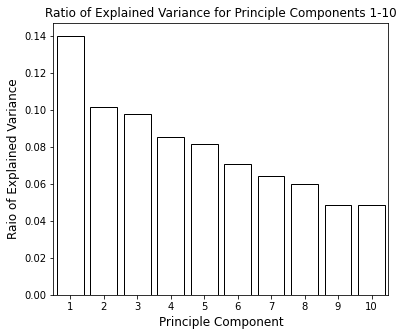

explained variance:
[0.14000538 0.10146303 0.09792021 0.08555597 0.08148031 0.07091931
 0.06420523 0.05996725 0.04864884 0.04830269]


In [16]:
pca_values, loadings = apply_pca(vlex_dp, 0, 1, components=10)

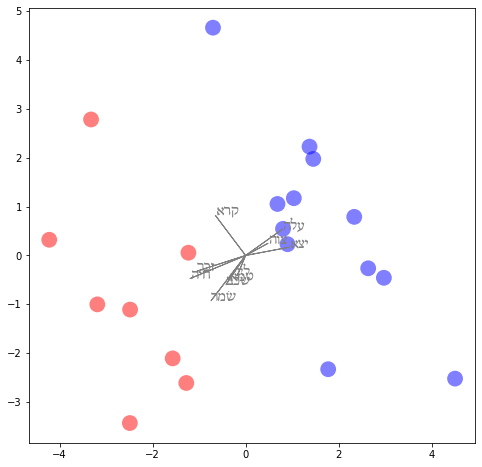

In [17]:
fig, ax = plt.subplots(figsize=(8, 8))

s = 250

vals = pca_values.loc[idx[:,'duration'],:]
x, y = (vals.iloc[:,0], vals.iloc[:,1])
ax.scatter(x, y, facecolor=[(1, 0, 0, 0.5)], edgecolor=[], s=s)

vals = pca_values.loc[idx[:,'location'],:]
x, y = (vals.iloc[:,0], vals.iloc[:,1])
ax.scatter(x, y, facecolor=[(0, 0, 1, 0.5)], edgecolor=[], s=s)

skip_feat = ['ordinal', 'demonstrative']
offsets = {
}
top_loadings = loadings.abs().sum().sort_values(ascending=False).index[:10]
texts = []
for feature in top_loadings:
    x_off, y_off, size = offsets.get(feature, (0,0,15)) # config offsets / size
    fx, fy = loadings[feature][:2] * 2
    plt.arrow(0, 0, fx, fy, color='#808080', linewidth=1, head_width=0)
    show_text = get_display(feature) # handle bidirectional
    texts.append(plt.text(fx+x_off, fy+y_off, show_text, color='#808080', size=size, fontfamily='SBL Biblit'))
#adjust_text(texts)
    
out.plot('PCA_durVSloc_VLEX')

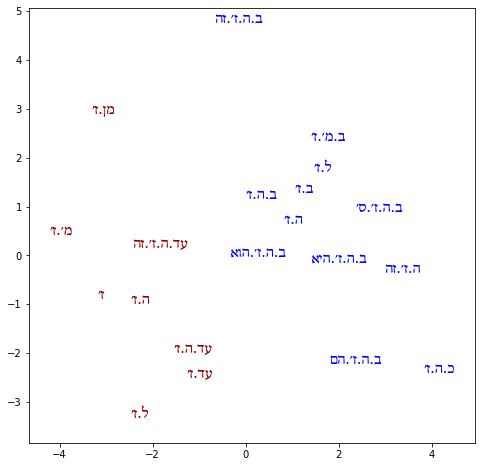

In [18]:
fig, ax = plt.subplots(figsize=(8, 8))

s = 70
x, y = (pca_values.iloc[:,0], pca_values.iloc[:,1])
ax.scatter(x, y, facecolor=[], s=2)

texts = []
qual2col = {'location': 'blue', 'duration': 'darkred'}
for lex_tok, qual in pca_values.index:
    tx, ty = pca_values.loc[idx[lex_tok, qual]][:2]
    show_lex = get_display(lex_tok)
    texts.append(plt.text(tx, ty, show_lex, size=15, 
                          color=qual2col[qual], fontfamily='SBL Biblit'))
adjust_text(texts)
out.plot('PCA_durVSloc_VLEX_text')

# Tense

In [19]:
vtense_ct = pd.pivot_table(
    df_sg[df_sg.lex_token.isin(top_token_ct.index)],
    index=['lex_token', 'quality'],
    columns=['verbform'],
    aggfunc='size',
    fill_value=0
)

vtense_ct = vtense_ct.loc[idx[:, ['location', 'duration']], :]
vtense_ct = vtense_ct[['qtl', 'wayq', 'yqtl', 'wqtl']]

vtense_ct

,verbform,qtl,wayq,yqtl,wqtl
lex_token,quality,,,,
ב.ה.ז׳,location,19,64,44,21
ב.ה.ז׳.הוא,location,24,77,56,54
ב.ה.ז׳.היא,location,17,26,11,1
ב.ה.ז׳.הם,location,10,4,5,0
ב.ה.ז׳.המה,location,1,0,3,1
ב.ה.ז׳.זה,location,6,4,7,4
ב.ה.ז׳.ס׳,location,18,44,35,15
ב.ז׳,location,76,12,79,16
ב.מ׳.ז׳,location,35,23,3,2


In [20]:
# drop verbs that only occur once
vtense_ct_ = vtense_ct.drop(
        columns=vtense_ct.columns[vtense_ct.sum() < 10]
    )

# re-filter rare tokens
vtense_ct_ = vtense_ct_.drop(
    index=vtense_ct_.index[vtense_ct_.sum(1) < 10]
)

In [21]:
vtense_ct_.shape

(20, 4)

In [22]:
vtense_ct_.sum(1)

lex_token   quality 
ב.ה.ז׳      location    148
ב.ה.ז׳.הוא  location    211
ב.ה.ז׳.היא  location     55
ב.ה.ז׳.הם   location     19
ב.ה.ז׳.זה   location     21
ב.ה.ז׳.ס׳   location    112
ב.ז׳        location    183
ב.מ׳.ז׳     location     63
ה.ז׳        duration     58
            location    117
ה.ז׳.זה     location     24
ז׳          duration     86
כ.ה.ז׳      location     11
ל.ז׳        duration    101
            location     22
מן.ז׳       duration     22
מ׳.ז׳       duration    219
עד.ה.ז׳     duration     54
עד.ה.ז׳.זה  duration     49
עד.ז׳       duration     94
dtype: int64

## PCA Analysis with Tense

In [23]:
vtense_dp = sig.apply_deltaP(vtense_ct_, 0, 1)
vtense_dp = vtense_dp.dropna()
vtense_dp.head()

,verbform,qtl,wayq,yqtl,wqtl
lex_token,quality,,,,
ב.ה.ז׳,location,-0.156303,0.179967,-0.046555,0.022891
ב.ה.ז׳.הוא,location,-0.179809,0.110471,-0.085077,0.154415
ב.ה.ז׳.היא,location,0.039574,0.211265,-0.144486,-0.106353
ב.ה.ז׳.הם,location,0.258437,-0.058565,-0.077448,-0.122424
ב.ה.ז׳.זה,location,0.015083,-0.078941,-0.006472,0.070331


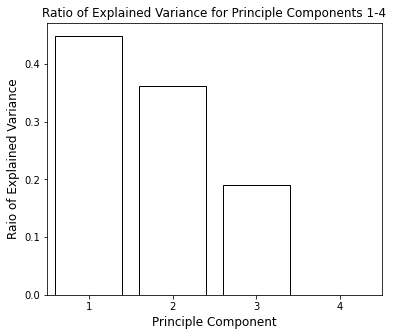

explained variance:
[4.48944292e-01 3.61263580e-01 1.89792129e-01 7.53345133e-33]


In [24]:
vtense_pca, vtense_loadings = apply_pca(vtense_dp, 0, 1, components=4)

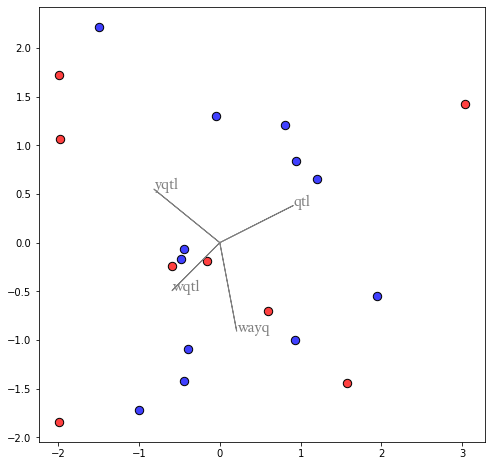

In [25]:
fig, ax = plt.subplots(figsize=(8, 8))

s = 70

vals = vtense_pca.loc[idx[:,'duration'],:]
x, y = (vals.iloc[:,0], vals.iloc[:,1])
ax.scatter(x, y, facecolor=[(1, 0, 0, 0.75)], edgecolor='black', s=s)

vals = vtense_pca.loc[idx[:,'location'],:]
x, y = (vals.iloc[:,0], vals.iloc[:,1])
ax.scatter(x, y, facecolor=[(0, 0, 1, 0.75)], edgecolor='black', s=s)

skip_feat = ['ordinal', 'demonstrative']
offsets = {
}
top_loadings2 = vtense_loadings.abs().sum().sort_values(ascending=False).index[:10]
texts = []
for feature in top_loadings2:
    x_off, y_off, size = offsets.get(feature, (0,0,15)) # config offsets / size
    fx, fy = vtense_loadings[feature][:2]
    plt.arrow(0, 0, fx, fy, color='#808080', linewidth=1, head_width=0)
    show_text = get_display(feature) # handle bidirectional
    texts.append(plt.text(fx+x_off, fy+y_off, show_text, color='#808080', size=size, fontfamily='SBL Biblit'))
#adjust_text(texts)
    
out.plot('PCA_durVSloc_TENSE')

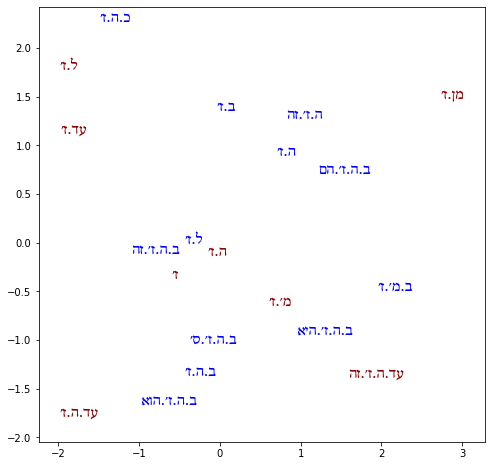

In [26]:
fig, ax = plt.subplots(figsize=(8, 8))

s = 70
x, y = (vtense_pca.iloc[:,0], vtense_pca.iloc[:,1])
ax.scatter(x, y, facecolor=[], s=2)

texts = []
qual2col = {'location': 'blue', 'duration': 'darkred'}
for lex_tok, qual in vtense_pca.index:
    tx, ty = vtense_pca.loc[idx[lex_tok, qual]][:2]
    show_lex = get_display(lex_tok)
    texts.append(plt.text(tx, ty, show_lex, size=15, 
                          color=qual2col[qual], fontfamily='SBL Biblit'))
adjust_text(texts)
out.plot('PCA_durVSloc_TENSE_text')